# Regresión Lineal Multivariable

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
url = 'https://raw.githubusercontent.com/adrishg/PythonML-PrebecariosProteco/master/DataSets/regresionLinealMultivariable.csv'
data = pd.read_csv(url, header = 0)
data.head()

,nrow,tiempo,altura
0,0,2.243013,88.191558
1,1,4.307589,220.246174
2,2,3.195260,149.843691
3,3,1.278103,44.102866
4,4,1.956540,79.644370


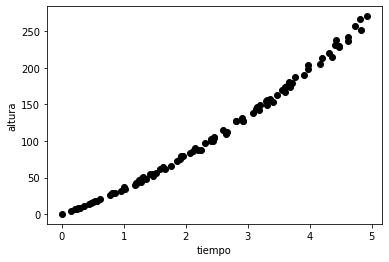

In [23]:
# Gráfica de los datos.
X = data.tiempo.values
Y = data.altura.values
plt.scatter(X, Y, c = 'k')
plt.xlabel('tiempo')
plt.ylabel('altura')
plt.show()

## Entrenamiento

In [0]:
#Función para separa los datos para entrenar el modelo (Training) y para probar el modelo (Test)
def separacionDatosTestTraining(x, y, tamanioTest=0.2):
    tamanioDatos= y.size
    t= int(tamanioTest * tamanioDatos)
    datosTest= np.random.choice(tamanioDatos, t) #Indices/Coeficientes de datos a retirar para el training
    datosTraining= np.setdiff1d( np.arange(tamanioDatos), datosTest)
    
    return x[datosTraining], y[datosTraining], x[datosTest], y[datosTest]  

In [0]:
def funcionDeHipotesis(x, theta):
    h = x @ theta
    return h

In [0]:
def funcionDeCosto(x, y, theta):
    h = funcionDeHipotesis(x, theta)
    m = y.size
    d = y - h
    j = d @ d / (2 * m)
    return j

In [0]:
def gradienteCostos(x, y, theta):
    m = y.size
    h = funcionDeHipotesis(x, theta)
    dj = ((h - y) @ x) / m
    return dj

In [0]:
def gradienteDescenso(x, y, alfa, E = 0.001):
    m = y.size
    x = np.hstack([np.ones([m, 1]), x])
    n = x.shape[1]
    theta = np.zeros([n])

    costoAnterior = funcionDeCosto(x, y, theta)
    theta = theta - alfa * gradienteCostos(x, y, theta)
    costoActual = funcionDeCosto(x, y, theta)

    diferencia = abs(costoActual - costoAnterior)

    iteraciones = [0, 1]
    historialCostos = [costoAnterior, costoActual]
    i = 2

    while diferencia > E:  # Mientras no converga
        costoAnterior = costoActual
        theta = theta - alfa * gradienteCostos(x, y, theta)
        costoActual = funcionDeCosto(x, y, theta)

        diferencia = abs(costoActual - costoAnterior)

        iteraciones.append(i)
        historialCostos.append(costoActual)
        i += 1

    plt.plot(iteraciones, historialCostos)
    plt.title('Funcion de costo respecto a las iteraciones')
    plt.xlabel('Iteraciones')
    plt.ylabel('costo')
    print("Ultimo costo:", historialCostos[-1])
    plt.show()
    return theta

Ultimo costo: 12.384129888470856


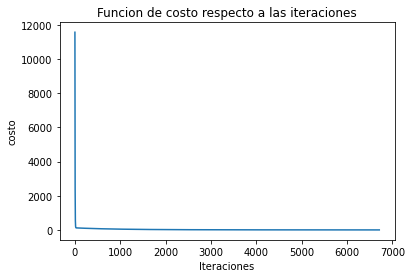

theta:
 [ 9.14459692 21.81818959  6.42389781]


In [29]:
alfa = 0.001
X = X.reshape([Y.size, 1])
X = np.hstack([X, X**2])
x_test, y_test, x_train, y_train = separacionDatosTestTraining(X, Y)
theta = gradienteDescenso(x_train, y_train, alfa)
print("theta:\n", theta)

In [30]:
x_test = np.hstack([np.ones([y_test.size, 1]), x_test])
print("Costo:", funcionDeCosto(x_test, y_test, theta))

Costo: 9.11641734451062


## Resultados

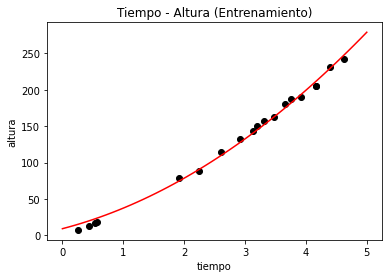

In [31]:
# Gráfica de datos entrenamiento y modelo obtenido.


x = np.linspace(0, 5)
y = theta[0] + theta[1] * x + theta[2]*x**2
plt.scatter(x_train[:, 0], y_train, c = 'k')
plt.plot(x, y, 'r')
plt.xlabel('tiempo')
plt.ylabel('altura')
plt.title('Tiempo - Altura (Entrenamiento)')
plt.show()

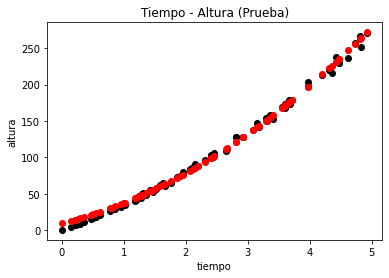

In [32]:
# Gráfica de datos de prueba y modelo obtenido.

ypred = theta[0] + theta[1] * x_test[:, 1] + theta[2]*x_test[:, 2]
plt.scatter(x_test[:, 1], y_test, c = 'k')
plt.plot(x_test[:, 1], ypred, 'or')
plt.xlabel('tiempo')
plt.ylabel('altura')
plt.title('Tiempo - Altura (Prueba)')
plt.show()

## Pruebas con sklearn

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [34]:
X = data.tiempo.values
Y = data.altura.values
X = X.reshape([Y.size, 1])
XX2 = np.hstack([X, X**2])

modelo = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(XX2, Y)

modelo.fit(x_train, y_train)
y_pred_sklearn = modelo.predict(x_test)
theta_sklearn = np.hstack([modelo.intercept_, modelo.coef_])
print("theta (sklearn):\n", theta_sklearn)

theta (sklearn):
 [-0.38877074 30.4752753   4.84924911]


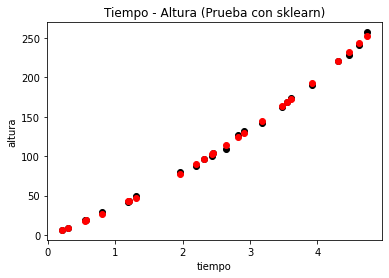

In [35]:
# Gráfica de datos de prueba y modelo obtenido con sklearn.

plt.scatter(x_test[:, 0], y_test, c = 'k')
plt.plot(x_test[:, 0], y_pred_sklearn, 'or')
plt.xlabel('tiempo')
plt.ylabel('altura')
plt.title('Tiempo - Altura (Prueba con sklearn)')
plt.show()

## Comparación de modelos (scratch vs sklearn)

In [36]:
t = np.linspace(0, 5, 100)
t = t.reshape([t.size, 1])
tt = np.hstack([np.ones([t.size, 1]), t, t**2])
print("theta (scratch):\n", theta)
print("\ntheta (sklearn):\n", theta_sklearn)

theta (scratch):
 [ 9.14459692 21.81818959  6.42389781]

theta (sklearn):
 [-0.38877074 30.4752753   4.84924911]


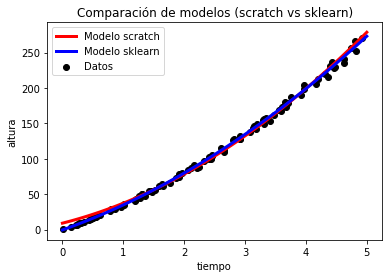

In [37]:
ypred_scratch = tt @ theta
ypred_sklearn = tt @ theta_sklearn
plt.scatter(X, Y, c = 'k', label = 'Datos')
plt.plot(t, ypred_scratch, c = 'r', lw = 3, label = 'Modelo scratch')
plt.plot(t, ypred_sklearn, c = 'b', lw = 3, label = 'Modelo sklearn')
plt.xlabel('tiempo')
plt.ylabel('altura')
plt.title('Comparación de modelos (scratch vs sklearn)')
plt.legend()
plt.show()